In [1]:
import cv2
from PIL import Image, ImageDraw, ImageFont
import sys
# define acllite library path
sys.path.append('../../Common/acllite')
# modules of acllite library
from acllite_model import AclLiteModel
from acllite_resource import AclLiteResource
from src.model import preprocessing, postprocessing, construct_image_info

In [2]:
# define device id & model path
device_id = 0
model_path = "./model/yolov3_caffe_416_no_csc.om"

# define image & coco_names path
img_path = "../../Common/data/dog.jpg"
coco_names_path  = "../../Common/data/coco.names"

In [3]:
with open(coco_names_path) as fd:
    coco_labels = fd.readlines()

coco_labels = [i[:-1] for i in coco_labels][0:]

In [4]:
# initialize acllite library
acl_resource = AclLiteResource()
acl_resource.init()

# load *.om model
model = AclLiteModel(model_path, device_id)

init resource stage:
Init resource success
Init model resource start...
[AclLiteModel] create model output dataset:
malloc output 0, size 24576
malloc output 1, size 32
Create model output dataset success
Init model resource success


In [5]:
# read image
img_org_bgr = cv2.imread(img_path)

In [6]:
# 1) pre-processing stage
data = preprocessing(img_org_bgr, model._model_desc)

In [7]:
# 2) model execution(forward) stage
result_list = model.execute([data, construct_image_info(model._model_desc)])

In [8]:
# 3) post-processing the raw predictions
bboxes = postprocessing(result_list, img_org_bgr, coco_labels, model._model_desc)

 bicycle: class  1, box  111  127  576  430, score  0.994141
 truck: class  7, box  471  87  693  165, score  0.962891
 dog: class  16, box  121  225  322  541, score  0.998047


In [9]:
img_out = Image.open(img_path)
img1 = ImageDraw.Draw(img_out)

for idx,bbox in enumerate(bboxes):
    img1.rectangle(list(bbox[0:4]), outline =(255,0,0), width=2)
    print(bbox[0:4], bbox[4], int(bbox[5]), coco_labels[int(bbox[5])])
    img1.rectangle((bbox[0], bbox[1] -15, bbox[0] + len(coco_labels[int(bbox[5])])*8, bbox[1]), 
                outline = (255,255,255), width=10) 
    
    img1.text((bbox[0]+5, bbox[1]-15), coco_labels[int(bbox[5])], (255,0,0), thickness=40)

[111.75, 127.73076923076923, 576.0, 430.96153846153845] 0.9941406 1 bicycle
[471.0, 87.1875, 693.2307692307693, 165.98076923076923] 0.9628906 7 truck
[121.5, 225.51923076923077, 322.1538461538462, 541.0384615384615] 0.9980469 16 dog


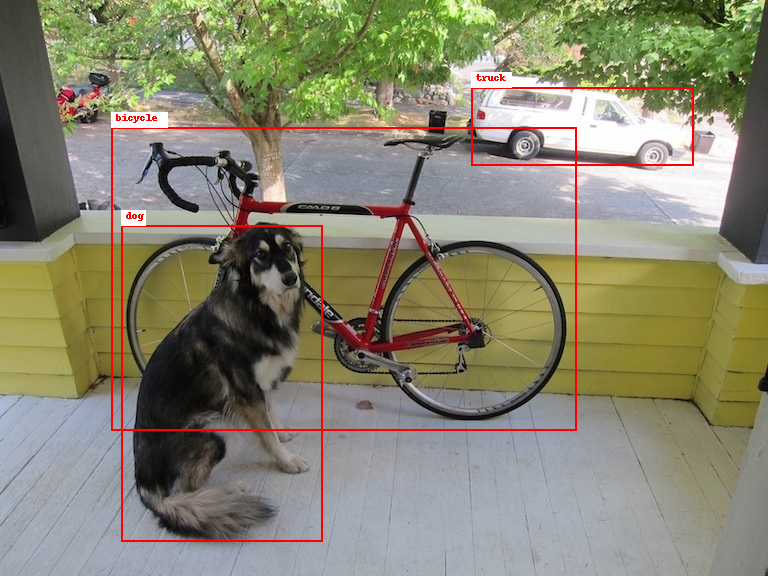

In [10]:
img_out